# IMPORT ALL LIBRARIES & PACKAGES 

In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# LOAD DATASET

In [2]:
od.download("https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data")

df = pd.read_excel('ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', sheet_name='E Comm')
print(df.shape)
df.head()

Skipping, found downloaded files in ".\ecommerce-customer-churn-analysis-and-prediction" (use force=True to force download)
(5630, 20)


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
# Drop Id Column
df.drop('CustomerID', axis=1, inplace=True)

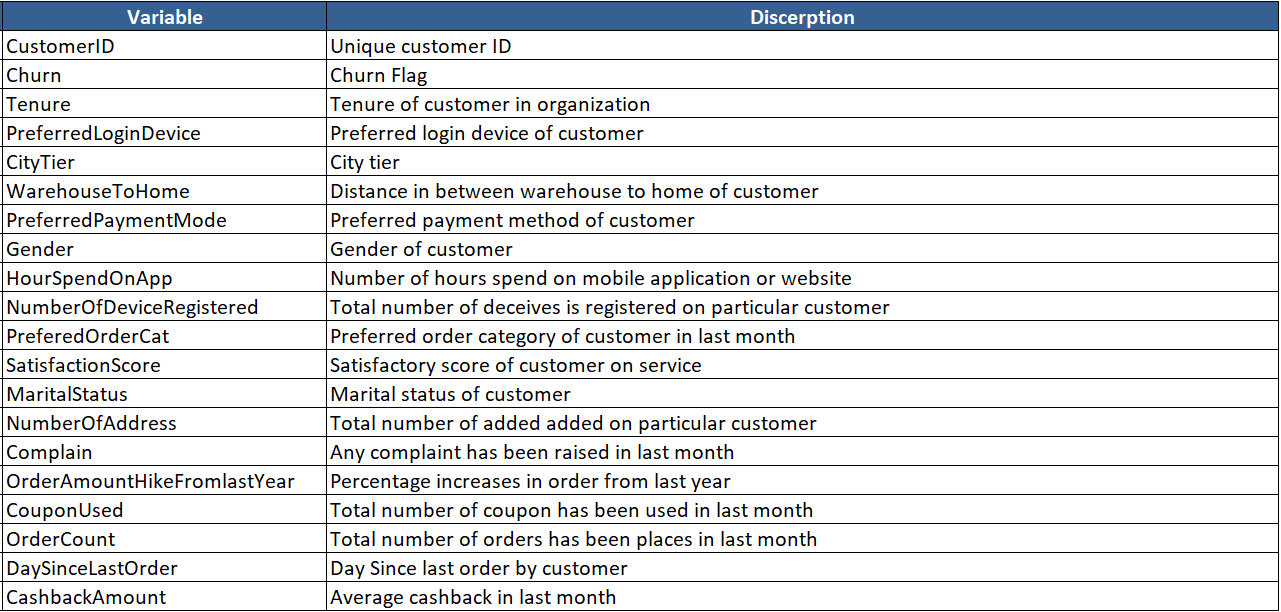

# EXPLORE DATASET ANALYSIS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Churn,5630.0,NaN,NaN,NaN,0.168384,0.37424,0.0,0.0,0.0,0.0,1.0
Tenure,5366.0,NaN,NaN,NaN,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
PreferredLoginDevice,5630,3,Mobile Phone,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,5630.0,NaN,NaN,NaN,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,5379.0,NaN,NaN,NaN,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
PreferredPaymentMode,5630,7,Debit Card,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5630,2,Male,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,5375.0,NaN,NaN,NaN,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,NaN,NaN,NaN,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0
PreferedOrderCat,5630,6,Laptop & Accessory,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Duplicate rows
print(df.duplicated().sum())

556


In [7]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
data_type = df.dtypes
missing_df = pd.DataFrame({
    'Missing Values': missing,
    'Percentage': missing_percent,
    'Data Type': data_type
})

print(f"Number of Rows with Missing Values : {df.isnull().any(axis=1).sum()} = {(df.isnull().any(axis=1).sum() / len(df) * 100):.2f}%")

missing_df = missing_df.sort_values(by='Missing Values', ascending=False)
missing_df

Number of Rows with Missing Values : 1675 = 33.01%


,Missing Values,Percentage,Data Type
DaySinceLastOrder,288,5.675995,float64
OrderAmountHikeFromlastYear,252,4.966496,float64
OrderCount,243,4.789121,float64
Tenure,231,4.552621,float64
HourSpendOnApp,230,4.532913,float64
WarehouseToHome,221,4.355538,float64
CouponUsed,210,4.138747,float64
Churn,0,0.000000,int64
MaritalStatus,0,0.000000,object
Complain,0,0.000000,int64


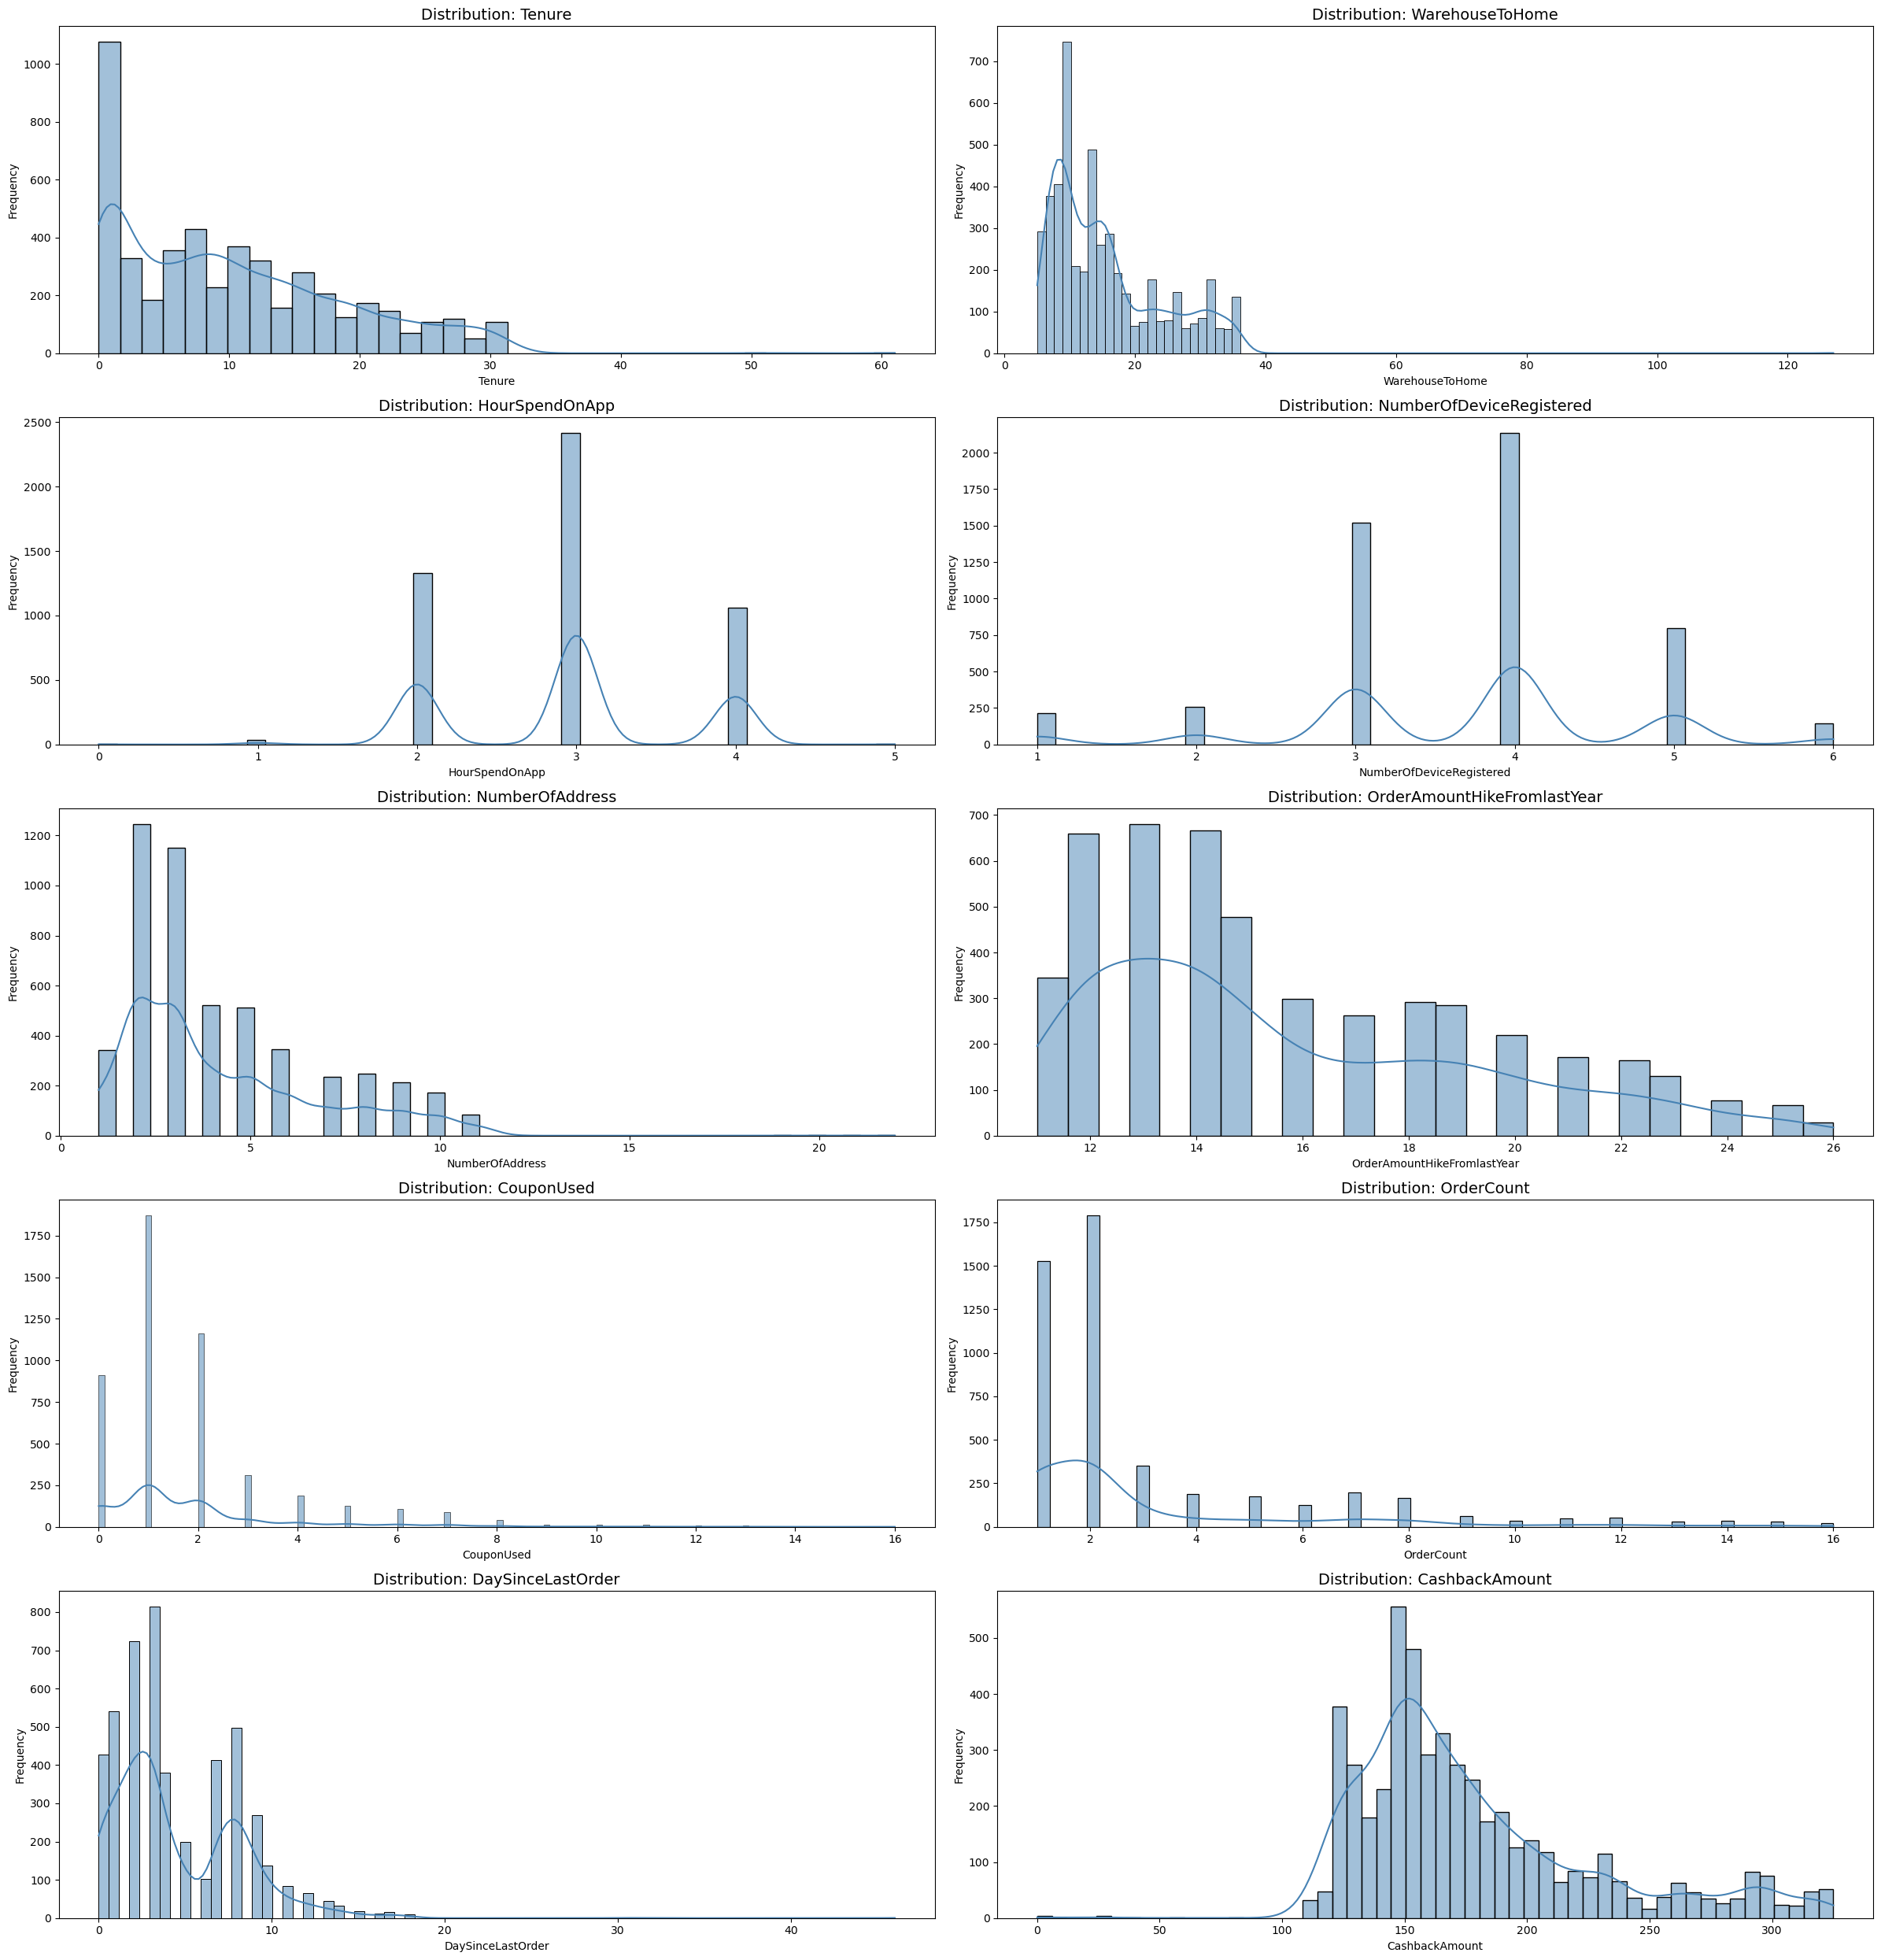

In [9]:
# This code to decide what will chosed for imputation missing value method based on data distribution. do will chosed mean or median

# Get all numeric/kuantitatif columns
numeric_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Set up grid: 2 plots per row
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Set overall figure size (12x5 per baris)
plt.figure(figsize=(12 * n_cols, 5 * n_rows))

# Plot each numeric column
for i, col in enumerate(numeric_cols, 1):

    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, color='steelblue', edgecolor='black')
    plt.title(f"Distribution: {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [10]:
# Imputation Missing Value with median
for col in numeric_cols:
  df[col] = df[col].fillna(df[col].median())

In [11]:
# convert discrete floats to int
def convert_discrete_floats_to_int(df, threshold=0.9999):
    converted_cols = []
    kept_as_float = []

    for col in df.select_dtypes(include=['float', 'float64']).columns:
        series = df[col].dropna()

        # Check if all float values are actually integers (e.g., 3.0, 7.0)
        if ((np.abs(series - series.round()) < (1 - threshold)).all()):
            df[col] = df[col].round().astype('int64')
            converted_cols.append(col)
        else:
            kept_as_float.append(col)

    print("✅ Columns converted to int64 (discrete float values):")
    print(converted_cols if converted_cols else "No columns matched.")
    print("\n💡 Columns kept as float (contain meaningful decimal values):")
    print(kept_as_float if kept_as_float else "All columns were converted.")

    return df

df = convert_discrete_floats_to_int(df)

✅ Columns converted to int64 (discrete float values):
['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

💡 Columns kept as float (contain meaningful decimal values):
['CashbackAmount']


In [12]:
# Split Numerical/kuantitatif & kategorikal
numeric_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
categorical_cols = df.columns.difference(numeric_cols).to_list()

print("Numeric Columns:")
print(numeric_cols)
print("\nCategorical Columns:")
print(categorical_cols)

Numeric Columns:
['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Categorical Columns:
['Churn', 'CityTier', 'Complain', 'Gender', 'MaritalStatus', 'PreferedOrderCat', 'PreferredLoginDevice', 'PreferredPaymentMode', 'SatisfactionScore']


## Class/Label Distribution

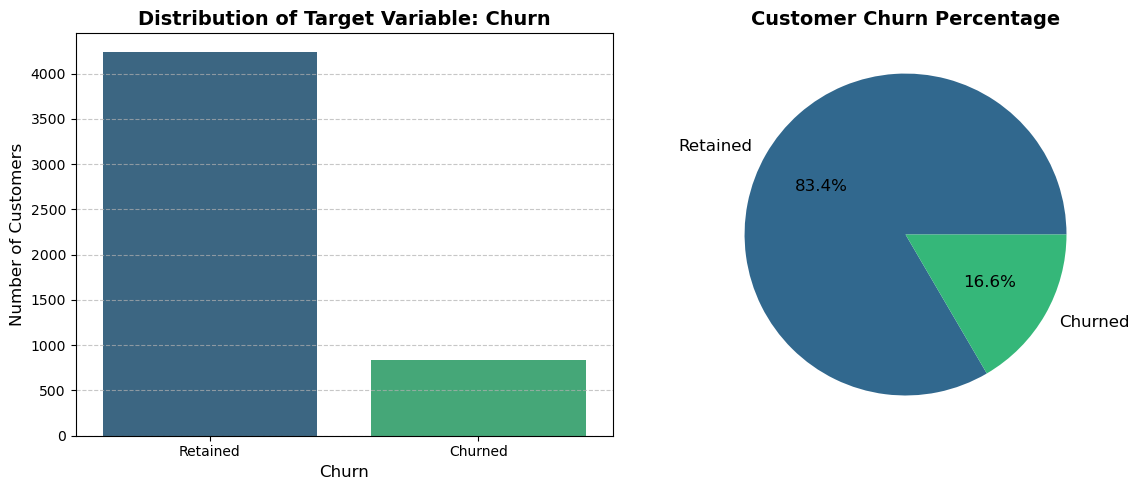

In [13]:
# Calculate the amount of churn and retained
counts = df['Churn'].value_counts()
labels = ['Retained', 'Churned']

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot 1: Churn distribution bar chart ---
sns.countplot(
    x='Churn',
    hue='Churn',
    data=df,
    palette='viridis',
    legend=False,
    ax=axes[0]
)
axes[0].set_title('Distribution of Target Variable: Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# ambil label dari xticks langsung
axes[0].set_xticks(range(len(labels)))
axes[0].set_xticklabels(labels)

# --- Plot 2: Churn percentage pie chart ---
axes[1].pie(
    counts,
    autopct='%1.1f%%',
    labels=labels,
    colors=sns.color_palette('viridis', len(labels)),
    textprops={"fontsize": 12}
)
axes[1].set_title('Customer Churn Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## Univariate Analysis

### Numerical Features
For each numeric feature :

*   Histogram + KDE (distribution shape)
*   Boxplot (outliers).
*    Summary stats(mean, std, min/max, skewness)

This section explores numerical features

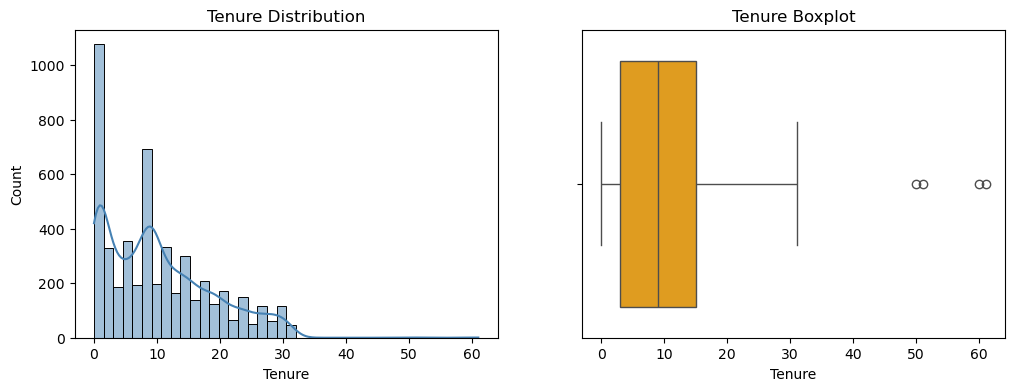

count    5074.000000
mean       10.158652
std         8.396085
min         0.000000
25%         3.000000
50%         9.000000
75%        15.000000
max        61.000000
Name: Tenure, dtype: float64
Skewness: 0.78, Kurtosis: 0.20



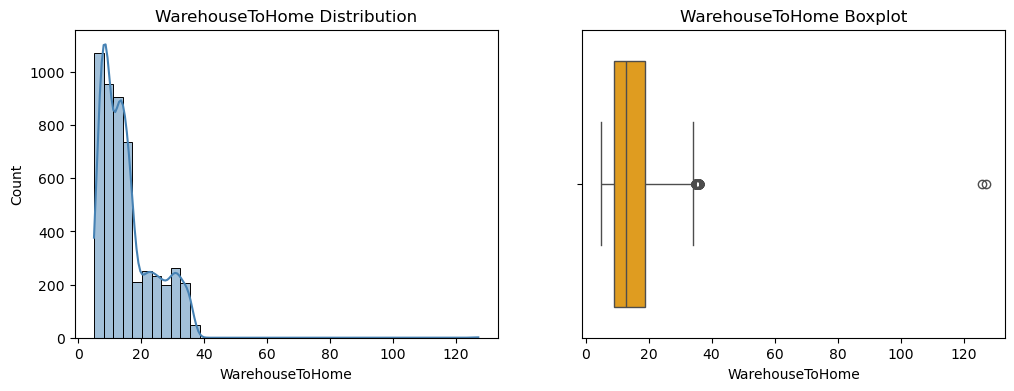

count    5074.000000
mean       15.435357
std         8.425568
min         5.000000
25%         9.000000
50%        13.000000
75%        19.000000
max       127.000000
Name: WarehouseToHome, dtype: float64
Skewness: 1.76, Kurtosis: 11.42



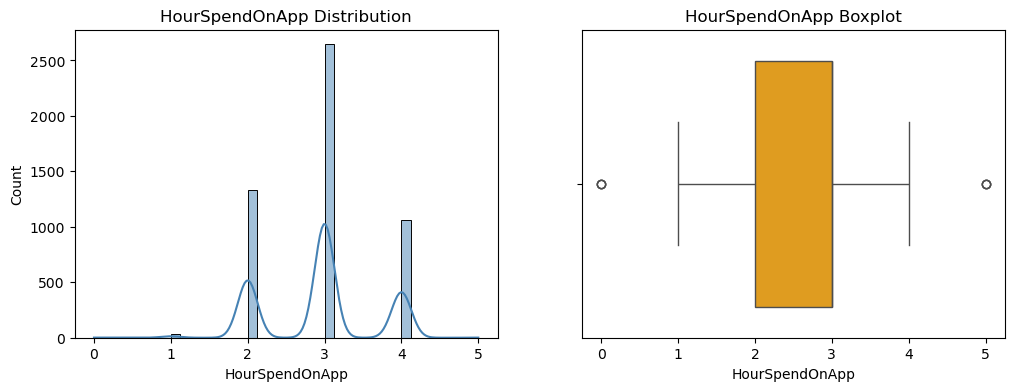

count    5074.00000
mean        2.93240
std         0.70729
min         0.00000
25%         2.00000
50%         3.00000
75%         3.00000
max         5.00000
Name: HourSpendOnApp, dtype: float64
Skewness: -0.04, Kurtosis: -0.54



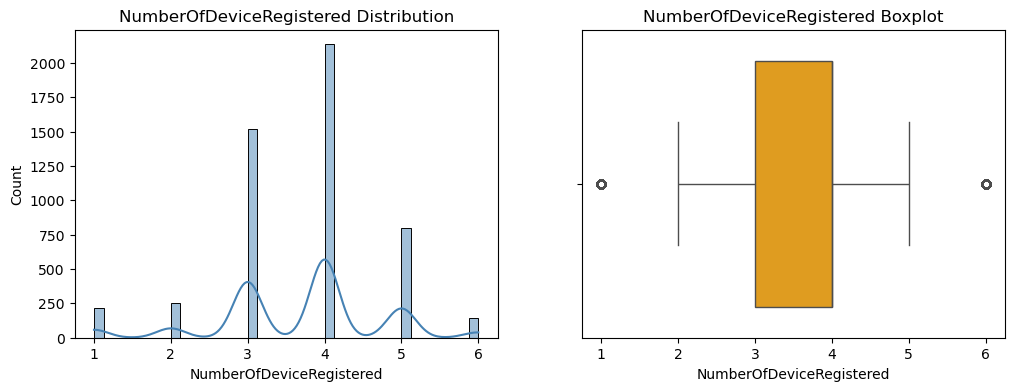

count    5074.000000
mean        3.686244
std         1.029670
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: NumberOfDeviceRegistered, dtype: float64
Skewness: -0.40, Kurtosis: 0.56



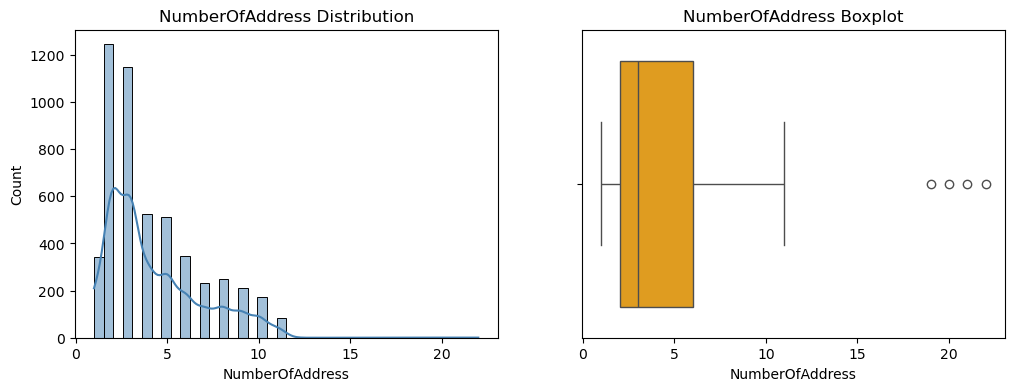

count    5074.000000
mean        4.194521
std         2.578819
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        22.000000
Name: NumberOfAddress, dtype: float64
Skewness: 1.11, Kurtosis: 1.09



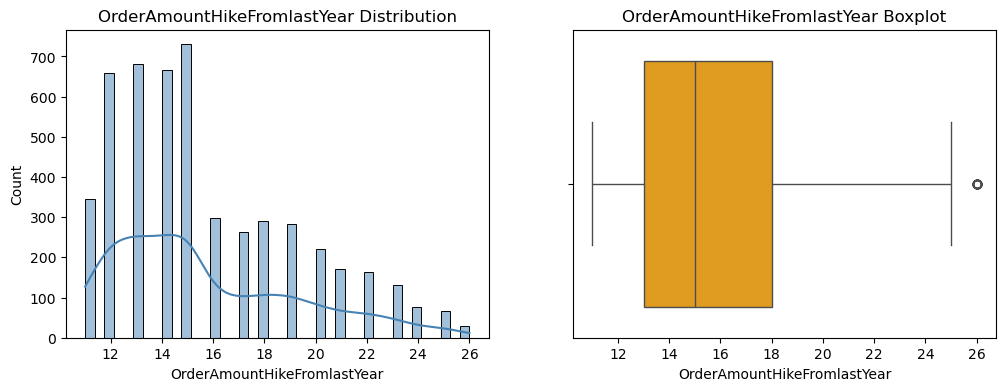

count    5074.000000
mean       15.678557
std         3.592399
min        11.000000
25%        13.000000
50%        15.000000
75%        18.000000
max        26.000000
Name: OrderAmountHikeFromlastYear, dtype: float64
Skewness: 0.84, Kurtosis: -0.13



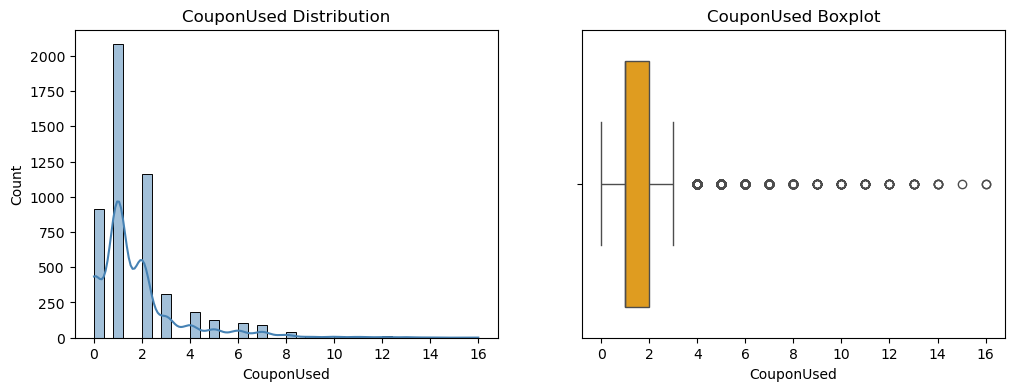

count    5074.000000
mean        1.772566
std         1.912925
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: CouponUsed, dtype: float64
Skewness: 2.54, Kurtosis: 8.87



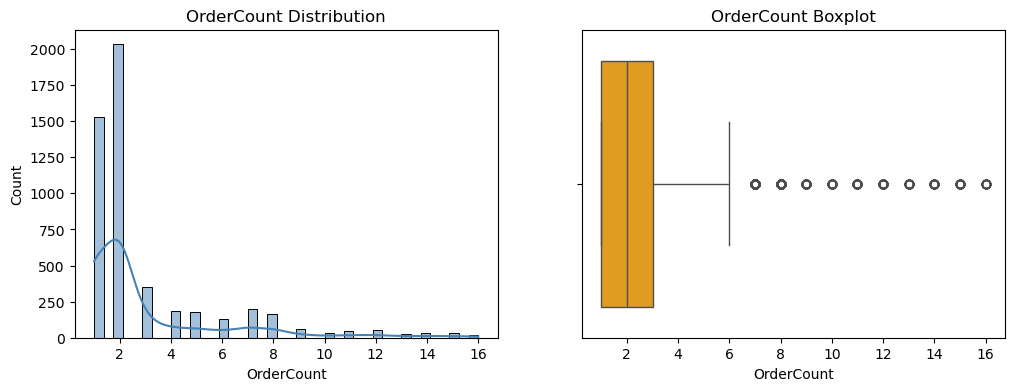

count    5074.000000
mean        3.041190
std         2.931923
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: OrderCount, dtype: float64
Skewness: 2.19, Kurtosis: 4.67



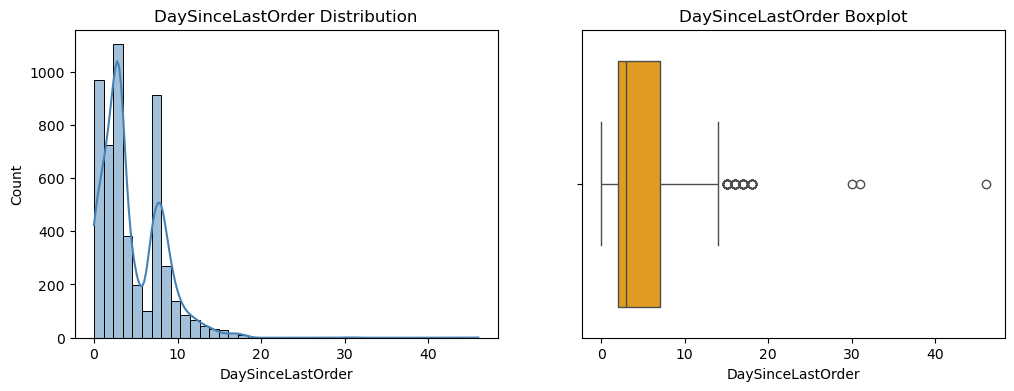

count    5074.000000
mean        4.492117
std         3.575884
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        46.000000
Name: DaySinceLastOrder, dtype: float64
Skewness: 1.31, Kurtosis: 4.80



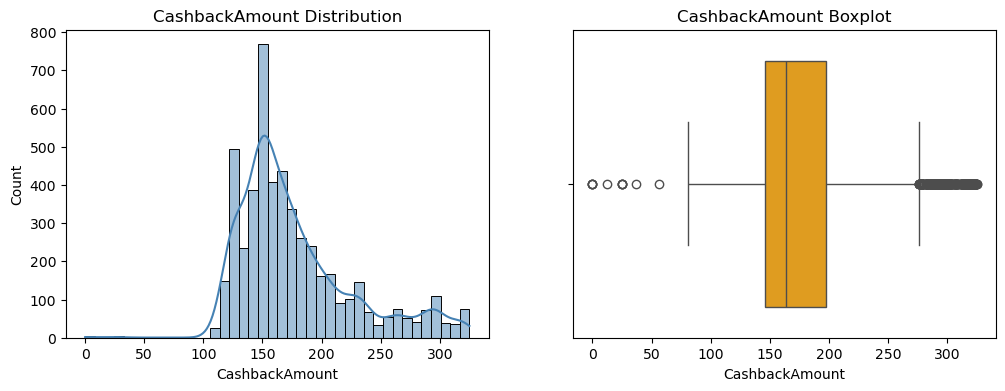

count    5074.000000
mean      177.639450
std        49.385904
min         0.000000
25%       145.915000
50%       163.870000
75%       197.950000
max       324.990000
Name: CashbackAmount, dtype: float64
Skewness: 1.13, Kurtosis: 0.97



In [14]:
for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col], kde=True, bins=40, ax=axes[0], color="steelblue")
    axes[0].set_title(f"{col} Distribution")
    sns.boxplot(x=df[col], ax=axes[1], color="orange")
    axes[1].set_title(f"{col} Boxplot")
    plt.show()
    print(df[col].describe().T)
    print(f"Skewness: {df[col].skew():.2f}, Kurtosis: {df[col].kurt():.2f}\n")

### Categorical Features

This section explores categorical features by plotting their frequency distributions



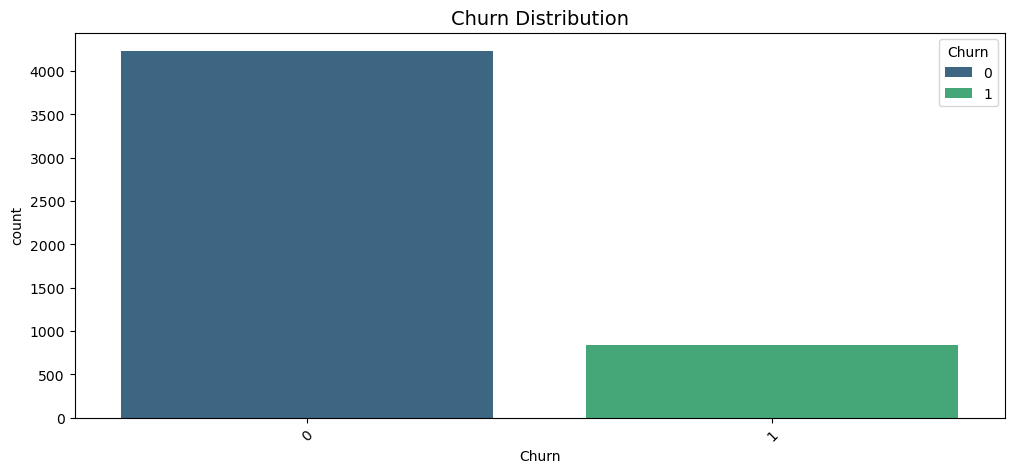

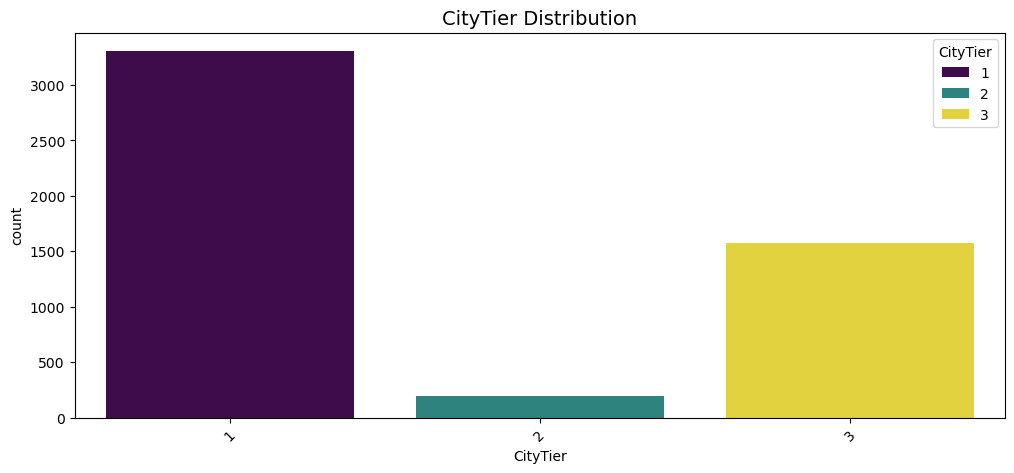

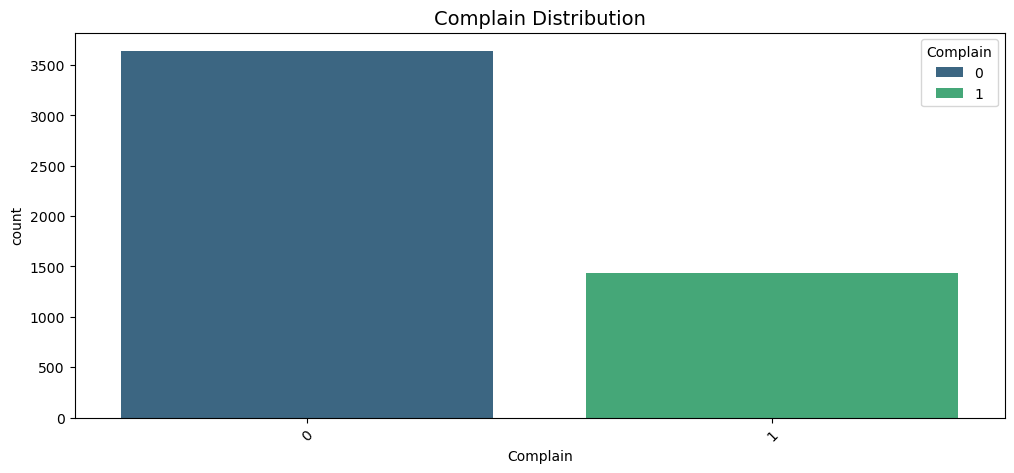

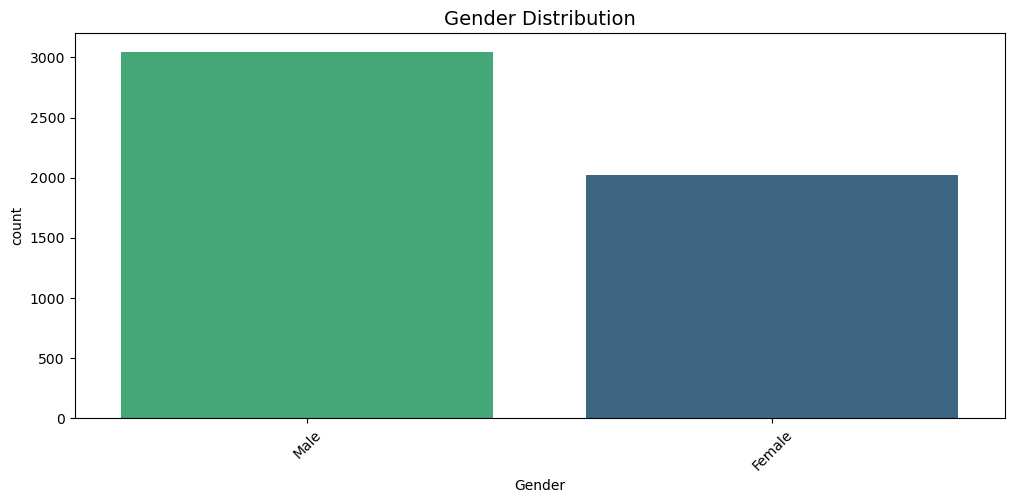

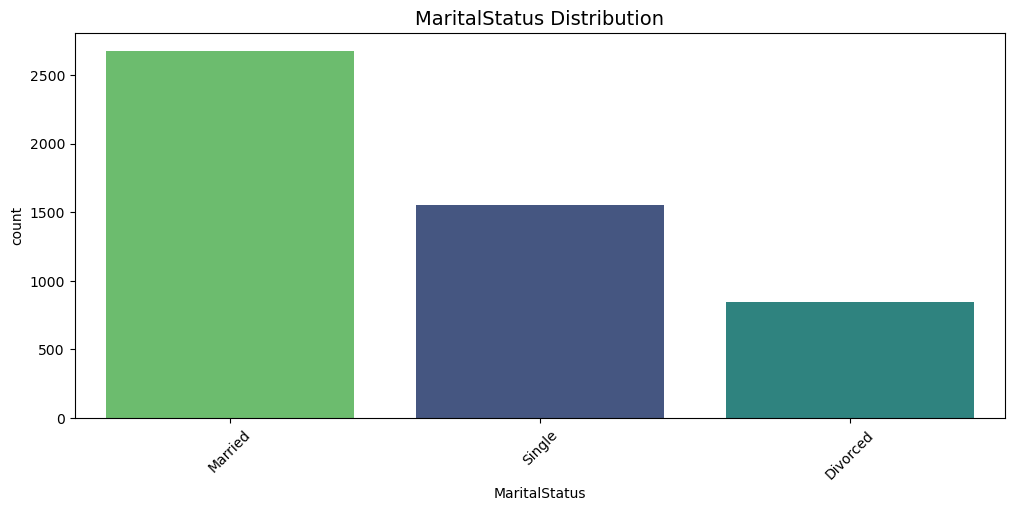

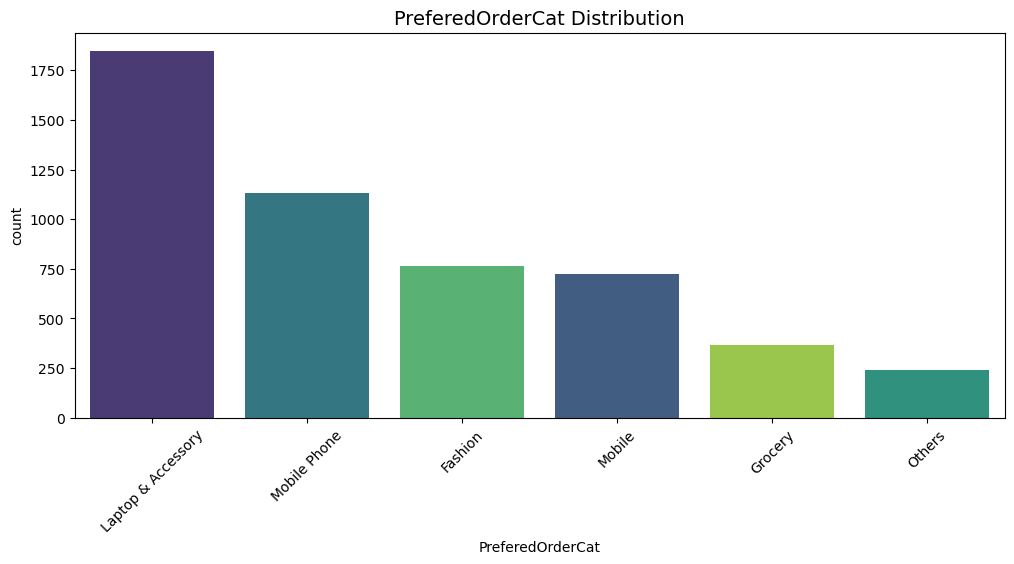

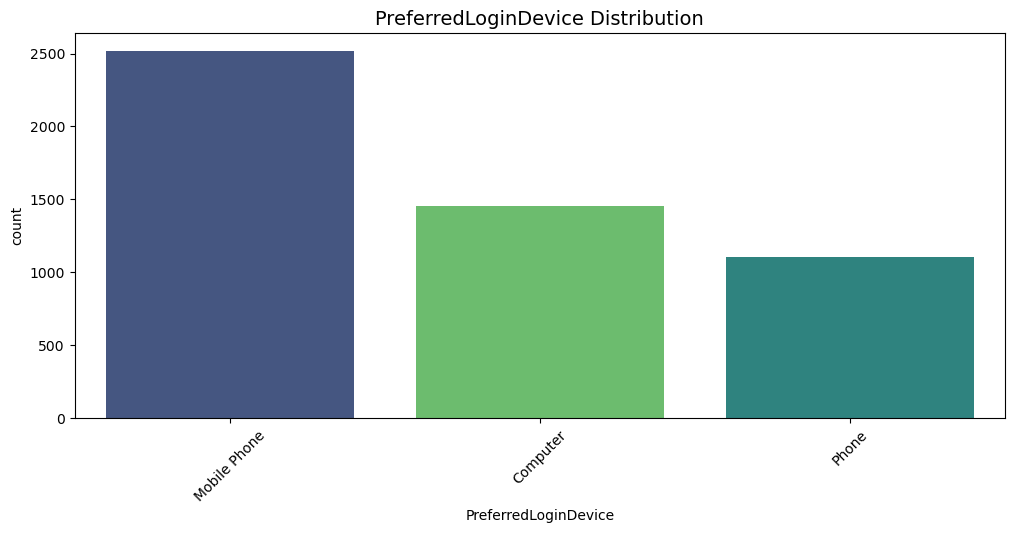

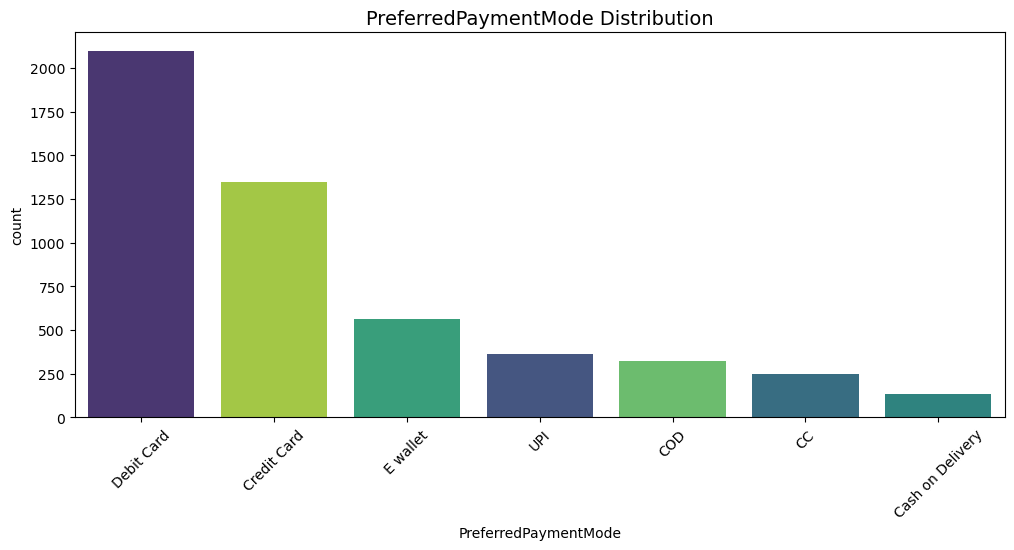

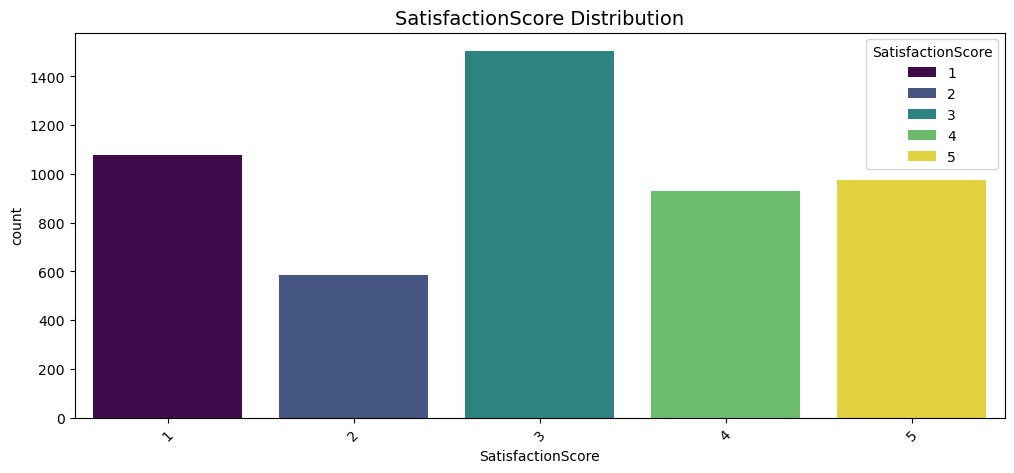

In [15]:
for col in categorical_cols:
    plt.figure(figsize=(12,5))

    if pd.api.types.is_integer_dtype(df[col]):
        order = sorted(df[col].dropna().unique())
    else:
        order = df[col].value_counts().index

    sns.countplot(x=col, data=df, order=order, palette="viridis", hue=col)
    plt.title(f"{col} Distribution", fontsize=14)
    plt.xticks(rotation=45)
    plt.show()


## Bivariate Analysis

### Relationship between Tenure and Customer Churn

        count       mean       std  min  25%   50%   75%   max
Churn                                                         
0      4233.0  11.399480  8.312531  0.0  5.0  10.0  17.0  61.0
1       841.0   3.913199  5.549846  0.0  0.0   1.0   8.0  21.0 



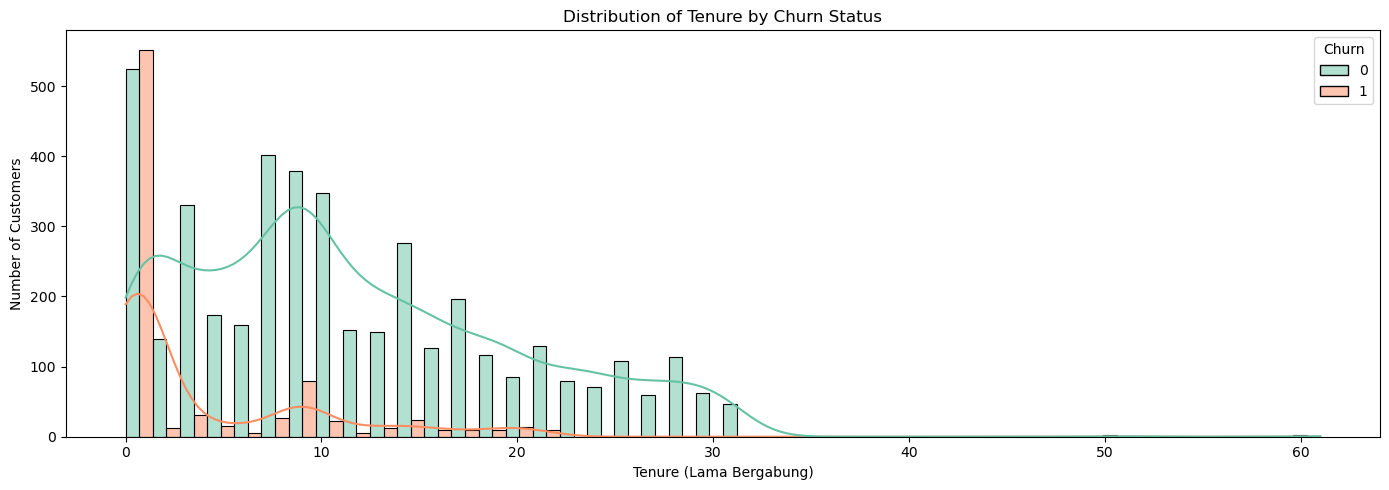

In [16]:
# Summary statistics of Tenure by Churn
print(df.groupby('Churn')['Tenure'].describe(), "\n")

plt.figure(figsize=(14, 5))

# --- Histogram Plot ---
sns.histplot(
    data=df,
    x='Tenure',
    hue='Churn',
    kde=True,
    palette='Set2',
    edgecolor='black',
    multiple='dodge'
)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (Lama Bergabung)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


### Relationship between Satisfication Score and Customer Churn

   SatisfactionScore     Churn
0                  1  0.115135
1                  2  0.126280
2                  3  0.172093
3                  4  0.170968
4                  5  0.230533 



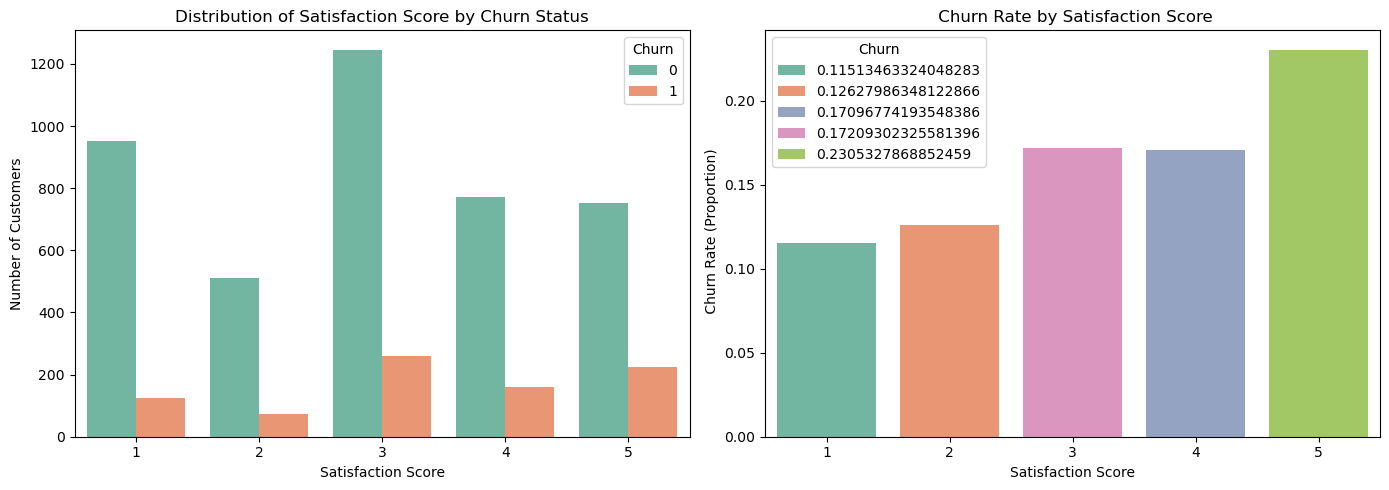

In [17]:
plt.figure(figsize=(14, 5))

# Calculate the churn rate for each SatisfactionScore
churn_rate = df.groupby('SatisfactionScore')['Churn'].mean().reset_index()
print(churn_rate,"\n")

# --- Plot 1: Distribution of Satisfaction Score by Churn status ---
plt.subplot(1, 2, 1)
sns.countplot(x='SatisfactionScore', hue='Churn', data=df, palette='Set2')
plt.title('Distribution of Satisfaction Score by Churn Status')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')

# --- Plot 2: Average churn rate for each Satisfaction Score ---
plt.subplot(1, 2, 2)
sns.barplot(x='SatisfactionScore', y='Churn', hue='Churn', data=churn_rate, palette='Set2')
plt.title(' Churn Rate by Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel(' Churn Rate (Proportion)')

plt.tight_layout()
plt.show()


### Relationship between Complain and Customer Churn

   Complain     Churn
0         0  0.107692
1         1  0.313110 



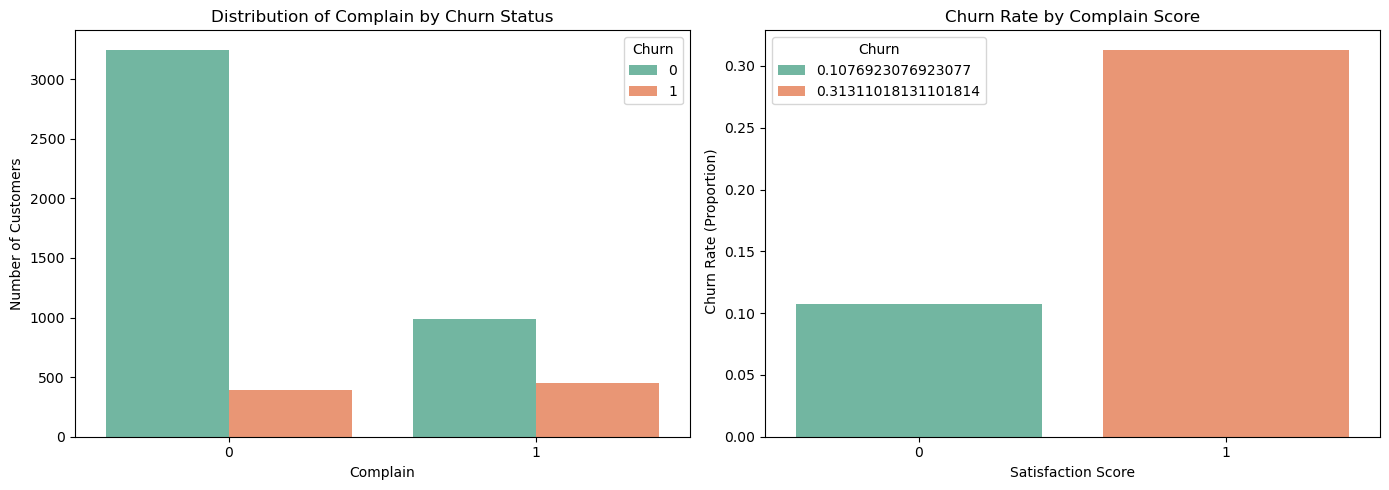

In [18]:
plt.figure(figsize=(14, 5))

# Calculate the churn rate for each Complain status
churn_rate = df.groupby('Complain')['Churn'].mean().reset_index()
print(churn_rate, "\n")

# --- Plot 1: Distribution of Complain by Churn status ---
plt.subplot(1, 2, 1)
sns.countplot(x='Complain', hue='Churn', data=df, palette='Set2')
plt.title('Distribution of Complain by Churn Status')
plt.xlabel('Complain')
plt.ylabel('Number of Customers')

# --- Plot 2: Average churn rate for each Satisfaction Score ---
plt.subplot(1, 2, 2)
sns.barplot(x='Complain', y='Churn', hue='Churn', data=churn_rate, palette='Set2')
plt.title('Churn Rate by Complain Score')
plt.xlabel('Satisfaction Score')
plt.ylabel(' Churn Rate (Proportion)')

plt.tight_layout()
plt.show()


### Relationship between MaritalStatus and Customer Churn

  MaritalStatus     Churn
0      Divorced  0.146226
1       Married  0.112982
2        Single  0.267225 



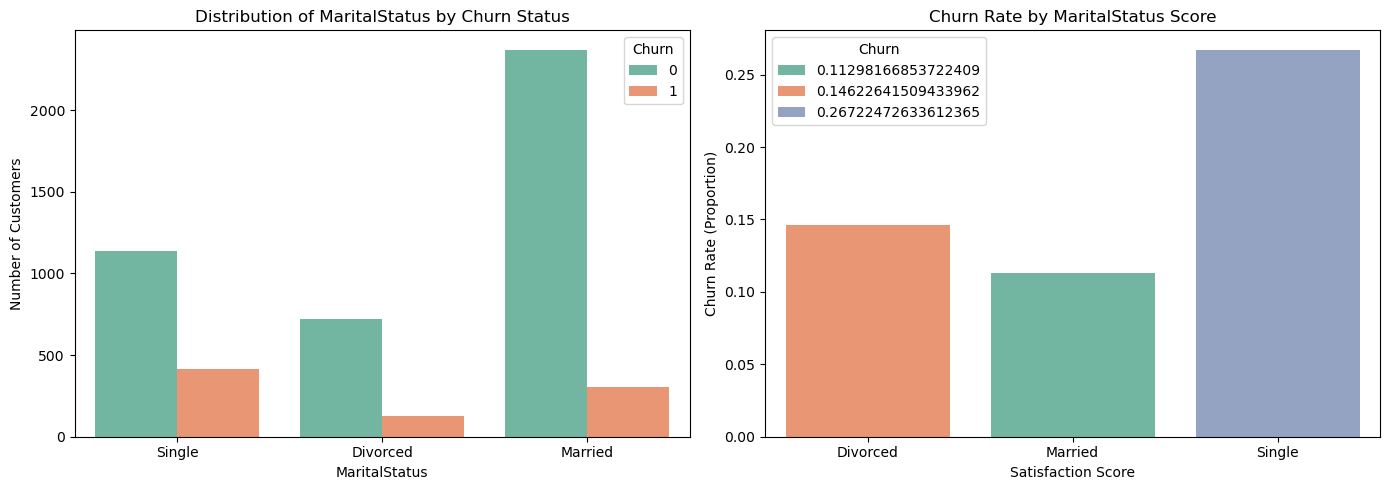

In [19]:
plt.figure(figsize=(14, 5))

# Calculate the churn rate for each MaritalStatus
churn_rate = df.groupby('MaritalStatus')['Churn'].mean().reset_index()
print(churn_rate, "\n")

# --- Plot 1: Distribution of Gender by Churn status ---
plt.subplot(1, 2, 1)
sns.countplot(x='MaritalStatus', hue='Churn', data=df, palette='Set2')
plt.title('Distribution of MaritalStatus by Churn Status')
plt.xlabel('MaritalStatus')
plt.ylabel('Number of Customers')

# --- Plot 2: Average churn rate for each Satisfaction Score ---
plt.subplot(1, 2, 2)
sns.barplot(x='MaritalStatus', y='Churn', hue='Churn', data=churn_rate, palette='Set2')
plt.title('Churn Rate by MaritalStatus Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Churn Rate (Proportion)')

plt.tight_layout()
plt.show()


## Multivariate  Analysis

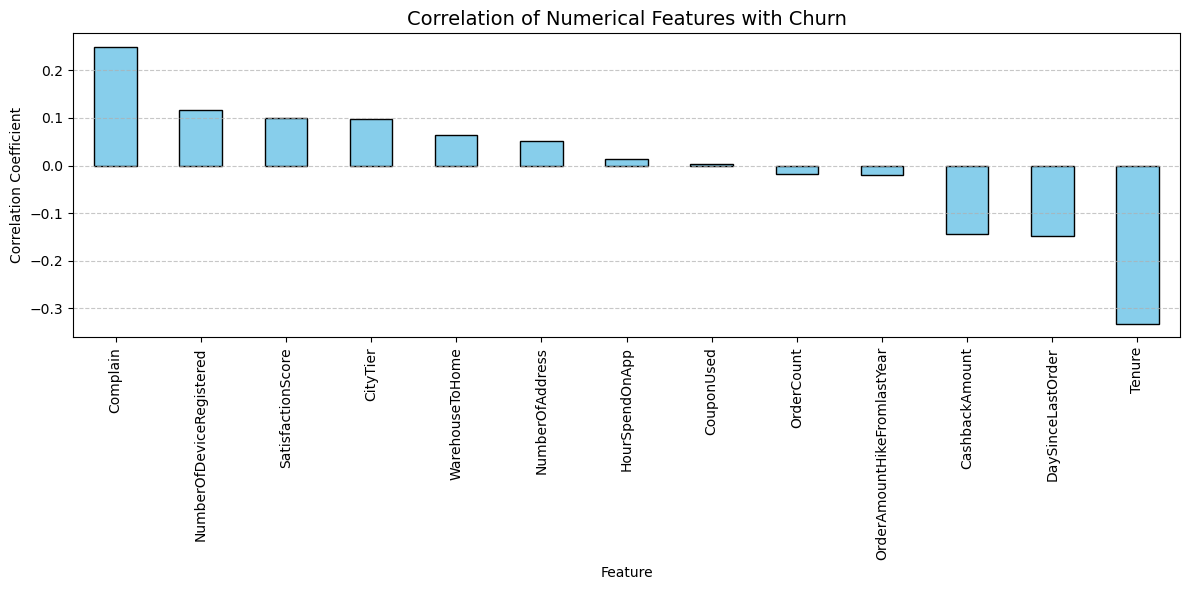

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlations with Churn
corr_with_churn = numeric_df.corr()['Churn'].sort_values(ascending=False)

# Drop the correlation of Churn with itself (which is always 1)
corr_with_churn = corr_with_churn.drop('Churn')

# Plot correlation as a bar chart
plt.figure(figsize=(12, 6))
corr_with_churn.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Correlation of Numerical Features with Churn', fontsize=14)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


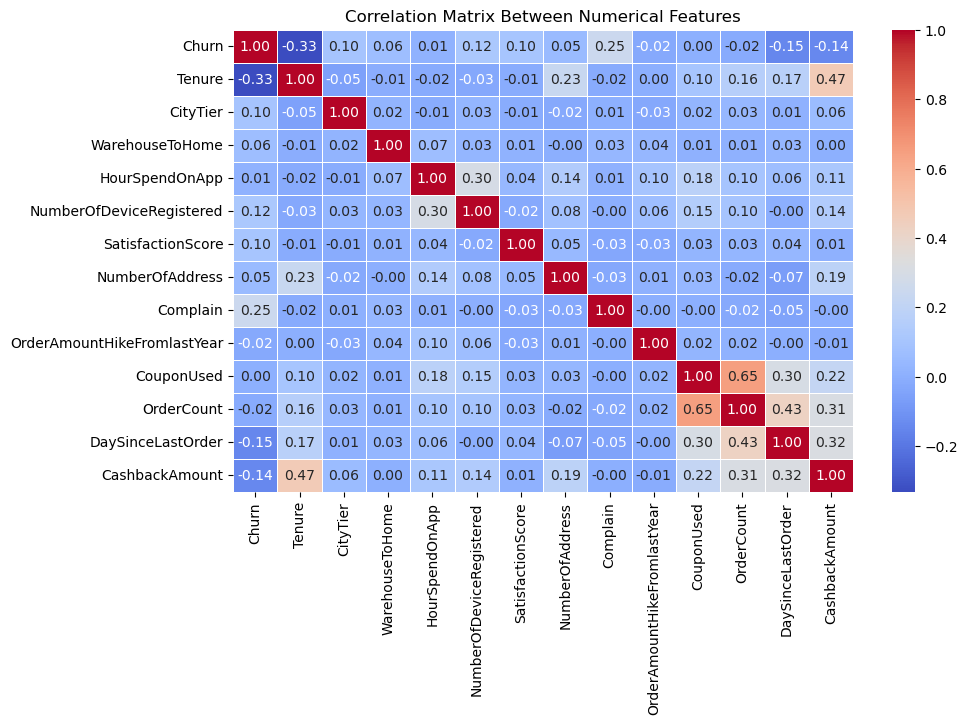

In [21]:
# Select only numerical columns (including Churn)
numeric_cols = df.select_dtypes(include=['int64', 'float64', 'Int64']).columns

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Display the full correlation matrix as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Between Numerical Features")
plt.show()


## Finding From Analysis
1. Customer Retention and Churn Balance
      *   Out of the total customers, 82.2% (4,682 users) were retained, while 16.8% (948 users) churned.
      *   This indicates a class imbalance, where the majority of users remain loyal.

2. Order Behavior
      *   Most customers made only 1–2 orders, suggesting that repeat purchasing behavior is relatively low.
      *   This could be a potential area for customer retention improvement.

3. Customer Complaints and Marital Status
      *   Customers who submitted complaints show a significantly higher churn rate.
      *   Similarly, customers with single marital status tend to churn more often than those who are married or partnered.

4. Engagement (HourSpendOnApp)
      *   Most customers spent 2–4 hours in the app, representing moderate engagement.
      *   However, this feature shows a weak correlation with churn, meaning app usage time might not strongly affect customer retention.

5. Tenure Effect
      *   The longer the customer tenure, the lower the churn rate.
      *   This suggests that long-term customers have stronger loyalty and satisfaction.

6. Feature Importance Insight
      *   The most influential features related to churn are Tenure and Complain.
      *   The least influential features realted to churn are CouponUsed and HourSpendOnApp




# PREPROCESSING

## Enncode Dataset Category

In [22]:
# Convert column dtype object to int
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le  # Save encoder-nya

df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4,1,3,6,4,0,3,3,2,2,2,9,1,11,1,1,5,159.93
1,1,9,2,1,8,6,1,3,4,3,3,2,7,1,15,0,1,0,120.90
2,1,9,2,1,30,4,1,2,4,3,3,2,6,1,14,0,1,3,120.28
3,1,0,2,3,15,4,1,2,4,2,5,2,8,0,23,0,1,3,134.07
4,1,0,2,1,12,0,1,3,3,3,5,2,3,0,11,1,1,3,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5623,0,5,0,1,12,3,1,4,4,2,5,2,2,0,20,2,2,3,224.36
5624,0,1,1,3,12,6,0,2,5,4,3,2,2,0,19,2,2,1,154.66
5626,0,13,1,1,13,3,1,3,5,0,5,1,6,0,16,1,2,3,224.91
5627,0,1,1,1,11,4,1,3,2,2,4,1,3,1,21,1,2,4,186.42


## Dataset Split

In [23]:
# Separate features (X) and targets (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# dataset spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Over Sampling

In [24]:
# implement SMOTE only at train dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# result
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled.value_counts())

Before SMOTE: Churn
0    3386
1     673
Name: count, dtype: int64
After SMOTE: Churn
1    3386
0    3386
Name: count, dtype: int64


# MODELING

In [25]:
# Define models
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
knn = KNeighborsClassifier()
svm = SVC(probability=True, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


# Training models
logistic_regression.fit(X_train_resampled, y_train_resampled)
knn.fit(X_train_resampled, y_train_resampled)
svm.fit(X_train_resampled, y_train_resampled)
random_forest.fit(X_train_resampled, y_train_resampled)
xgboost.fit(X_train_resampled, y_train_resampled)


C:\Users\hafis\anaconda3\envs\My_Project\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:38:10] WARNING: D:\bld\xgboost-split_1758007502304\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


# EVALUATION MODELS

In [26]:
models = {
    "Logistic Regression": logistic_regression,
    "KNN": knn,
    "SVM": svm,
    "Random Forest": random_forest,
    "XGBoost": xgboost
}

results = []

for name, model in models.items():
    # Predict class
    y_pred = model.predict(X_test)


    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert to DataFrame for better view
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False)

# Display table
results_df


,Model,Accuracy,Precision,Recall,F1 Score
3,Random Forest,0.957635,0.837838,0.922619,0.878187
4,XGBoost,0.952709,0.812500,0.928571,0.866667
1,KNN,0.817734,0.472669,0.875000,0.613779
0,Logistic Regression,0.740887,0.371968,0.821429,0.512059
2,SVM,0.699507,0.331695,0.803571,0.469565


# CONCLUSION

Model: Random Forest

Accuracy: 0.9576354679802955

Classification Report:

              precision    recall  f1-score   support

           0     0.9843    0.9646    0.9744       847
           1     0.8378    0.9226    0.8782       168

    accuracy                         0.9576      1015
   macro avg     0.9111    0.9436    0.9263      1015
weighted avg     0.9601    0.9576    0.9584      1015



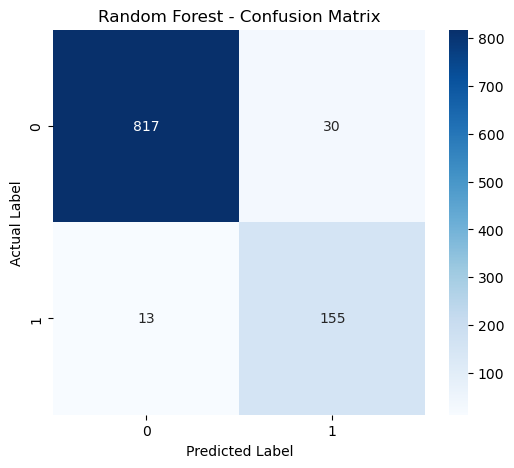

In [27]:
# Predict on test data
y_pred = random_forest.predict(X_test)

# Print accuracy and classification report
print("Model: Random Forest\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=random_forest.classes_,
            yticklabels=random_forest.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Random Forest - Confusion Matrix")
plt.show()

From all the models tested, the Random Forest achieved the best performance, reaching around 95% accuracy and 92% F1-score. This shows that the model is not only accurate but also maintains a good balance between precision and recall. In this churn prediction case, Random Forest appears to be the most suitable and reliable model compared to others, showing strong capability.

To achieve even better performance, the Random Forest model could be further improved through hyperparameter tuning and by experimenting with different optimizers or advanced techniques. Since this project only focused on baseline testing of several models, these steps could help refine and optimize the final model for churn prediction.

# SAVE MODEL

In [31]:
import joblib
from joblib import dump
import os

In [32]:
# Save The Best Performance Model Based on Accuracy and FI Score
filename = 'trained_random_forest_model.pkl'
joblib.dump(random_forest, filename)

['trained_random_forest_model.pkl']

In [33]:
# Define the directory where all encoders will be saved
output_dir = './saved_encoders'

# Create the directory if it doesn't exist yet
os.makedirs(output_dir, exist_ok=True)

# Loop through each encoder in the 'encoders' dictionary and save Those Encoder
for feature_name, encoder_object in encoders.items():
    filename = f'{output_dir}/{feature_name}_encoder.joblib'
    dump(encoder_object, filename)
    print(f"✅ Successfully saved LabelEncoder for '{feature_name}' to {filename}")

✅ Successfully saved LabelEncoder for 'PreferredLoginDevice' to ./saved_encoders/PreferredLoginDevice_encoder.joblib
✅ Successfully saved LabelEncoder for 'PreferredPaymentMode' to ./saved_encoders/PreferredPaymentMode_encoder.joblib
✅ Successfully saved LabelEncoder for 'Gender' to ./saved_encoders/Gender_encoder.joblib
✅ Successfully saved LabelEncoder for 'PreferedOrderCat' to ./saved_encoders/PreferedOrderCat_encoder.joblib
✅ Successfully saved LabelEncoder for 'MaritalStatus' to ./saved_encoders/MaritalStatus_encoder.joblib
